In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.13.1


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
# Data Exploration

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
# Check to see if the integers can be converted to words

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
# Data Preparation: The data needs to be prepared for classification
# pad sequences function  allows the data to be of |standardized lengths 

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [13]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [14]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [0]:
# Model Building

In [141]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 8))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 8)           80000     
_________________________________________________________________
global_average_pooling1d_12  (None, 8)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
# the layers are stacked sequentially to build a classifiaer.
# first layer is an Embedding lyaer which takes the integer-encoded vocabulary and 
# looks up the embedding vector for each word-index. These vectors are what the 
# model learns during training. 

# the GlobalAveragePooling1D layer returns a fixed length output vectot for 
# each example by averaging over the sequence dimension. this allows variable length
# inputs to be handled simply.

# the Dense layer pipes the fixed length vector with 16 hidden units
# The last layers is densely connected with a single output node and uses a sigmoid 
# activation function to get a value between 0 and 1 to represent a probability.

In [0]:
# Hidden units
# There are 2 hidden units between the input and output. The number of units is the
# dimension of representational space for the layer. 
# more hidden units and/or more layers allows learning of complex representations.
# it can also lead to learning of unwanted patterns and makes it computationally 
# expensive. This is called overfitting

In [0]:
# loss function and optimizer. 
# since this is a binary classification task, the output is a probability between
# 0 and 1. thu swe use the binary_crossentropy loss function.
# mean_squared error can also be used but binary_crossentropy is a better choice
# for binary classification problems. 
# mean_squared_error is good for regression problems

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])

In [0]:
# Creating a validation set
# we set aside 10000 examples to check the accuracy on data the model has not seen
#before.

x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [146]:
# Training the model

history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, 
           validation_data = (x_val, y_val), verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 78us/sample - loss: 0.6927 - acc: 0.5428 - val_loss: 0.6922 - val_acc: 0.5927
Epoch 2/40
15000/15000 [==============================] - 1s 43us/sample - loss: 0.6910 - acc: 0.6515 - val_loss: 0.6895 - val_acc: 0.7457
Epoch 3/40
15000/15000 [==============================] - 1s 42us/sample - loss: 0.6867 - acc: 0.7159 - val_loss: 0.6836 - val_acc: 0.7445
Epoch 4/40
15000/15000 [==============================] - 1s 42us/sample - loss: 0.6777 - acc: 0.7538 - val_loss: 0.6724 - val_acc: 0.7340
Epoch 5/40
15000/15000 [==============================] - 1s 42us/sample - loss: 0.6624 - acc: 0.7564 - val_loss: 0.6554 - val_acc: 0.7661
Epoch 6/40
15000/15000 [==============================] - 1s 43us/sample - loss: 0.6401 - acc: 0.7789 - val_loss: 0.6310 - val_acc: 0.7677
Epoch 7/40
15000/15000 [==============================] - 1s 42us/sample - loss: 0.6104 - acc: 0.7928 - val_loss: 0.

In [147]:
# Create a graph of accuracy and loss over time

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

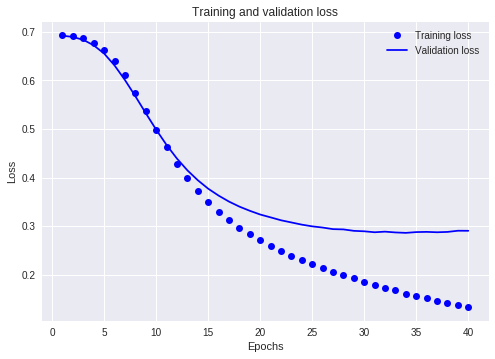

In [148]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

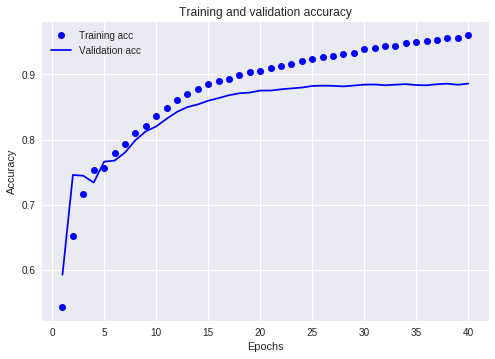

In [149]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()